## Challenge (Modelling)

In [1]:
# Libraries for path management and data analysis
import os
import pandas as pd

In [2]:
# Going to the root of the project
os.chdir('..')

In [3]:
data = pd.read_csv('data/application_info.csv')

/tmp/ipykernel_4237/851070366.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/application_info.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 98 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 307511 non-null  int64  
 1   id                         307511 non-null  int64  
 2   default                    307511 non-null  int64  
 3   contract_type              307511 non-null  object 
 4   gender                     307511 non-null  object 
 5   flag_vehicle               307511 non-null  object 
 6   flag_properties            307511 non-null  object 
 7   num_children               307511 non-null  int64  
 8   total_income               307511 non-null  object 
 9   loan_amount                307511 non-null  object 
 10  anual_payment              307499 non-null  object 
 11  product_amount             307233 non-null  object 
 12  accompained                306219 non-null  object 
 13  income_type                30

In [5]:
o_col = data.columns
features = list(o_col)
features

['Unnamed: 0',
 'id',
 'default',
 'contract_type',
 'gender',
 'flag_vehicle',
 'flag_properties',
 'num_children',
 'total_income',
 'loan_amount',
 'anual_payment',
 'product_amount',
 'accompained',
 'income_type',
 'education',
 'marital_status',
 'residence_type',
 'normalised_pop',
 'age',
 'work_age',
 'registry_age',
 'id_age',
 'vehicle_age',
 'flag_cellphone',
 'flag_work_phone',
 'flag_work_company',
 'flag_cellphone_answer',
 'flag_homephone',
 'flag_email',
 'occupation',
 'family_num',
 'region_score',
 'region_city_score',
 'dayofweek_application',
 'hour_application',
 'flag_direperm_direcon_reg',
 'flag_direperm_diretra_reg',
 'flag_direcon_diretra_reg',
 'flag_direperm_direcon_ciu',
 'flag_direperm_diretra_ciu',
 'flag_direcon_diretra_ciu',
 'type_organisation',
 'external_score_1',
 'external_score_2',
 'external_score_3',
 'num_apart_average',
 'area_basement_average',
 'age_expl_average',
 'age_building_average',
 'area_common_average',
 'num_lifts_average',
 'num

In [6]:
data = data.drop(['Unnamed: 0','id','education','residence_type'], axis=1)

In [7]:
data.head(5)

,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,anual_payment,product_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
0,1,personal loan,M,N,Y,0,202500,"406597,5","24700,5",351000,...,"0,0149",brick,N,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,personal loan,F,N,N,0,270000,"1293502,5","35698,5",1129500,...,"0,0714",concrete,N,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,credit card,M,Y,Y,0,67500,135000,6750,135000,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,personal loan,F,N,Y,0,135000,"312682,5","29686,5",297000,...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,personal loan,M,N,Y,0,121500,513000,"21865,5",513000,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
column_equivalence = {}
features = list(data.columns)
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        categorical_column = data[data.columns[i]].astype("category")
        column_equivalence[i] = dict(enumerate(categorical_column.cat.categories))
        data[data.columns[i]] = categorical_column.cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [9]:
column_equivalence

{1: {0: 'credit card', 1: 'personal loan'},
 2: {0: 'F', 1: 'M', 2: 'not specified'},
 3: {0: 'N', 1: 'Y'},
 4: {0: 'N', 1: 'Y'},
 6: {0: '1,17e+08',
  1: '100071',
  2: '100089',
  3: '100125',
  4: '1001826',
  5: '100278',
  6: '100300,5',
  7: '100350',
  8: '100476',
  9: '100507,5',
  10: '100516,5',
  11: '100566',
  12: '100629',
  13: '100786,5',
  14: '100800',
  15: '100854',
  16: '1009368',
  17: '100944',
  18: '101083,5',
  19: '101119,5',
  20: '101128,5',
  21: '101164,5',
  22: '101250',
  23: '1012500',
  24: '101362,5',
  25: '101520',
  26: '101700',
  27: '101740,5',
  28: '101826',
  29: '101835',
  30: '101902,5',
  31: '102024',
  32: '102150',
  33: '102222',
  34: '102343,5',
  35: '102352,5',
  36: '102465',
  37: '102546',
  38: '102600',
  39: '102694,5',
  40: '102780',
  41: '103000,5',
  42: '103041',
  43: '103050',
  44: '103149',
  45: '103230',
  46: '103387,5',
  47: '103401',
  48: '103432,5',
  49: '103500',
  50: '1035000',
  51: '103729,5',
  5

In [10]:
data.head(5)

,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,anual_payment,product_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
0,1,1,1,0,1,0,1053,3266,3501,505,...,140,0,0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,0,0,0,1374,1019,5978,46,...,705,1,0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,1,1,0,2093,1182,11786,131,...,-1,-1,-1,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,1,0,455,2901,4616,458,...,-1,-1,-1,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,1,0,1,0,296,3717,2863,677,...,-1,-1,-1,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
corr = data.corr()['default'] 
#filt = corr[(corr<=-0.02) & (corr>=0.02)]
dis = list(corr[(corr>-0.02) & (corr<0.02)].index)
dis

['flag_properties',
 'num_children',
 'total_income',
 'anual_payment',
 'product_amount',
 'accompained',
 'income_type',
 'marital_status',
 'vehicle_age',
 'flag_cellphone',
 'flag_cellphone_answer',
 'flag_email',
 'family_num',
 'dayofweek_application',
 'flag_direperm_direcon_reg',
 'flag_direperm_diretra_reg',
 'flag_direcon_diretra_reg',
 'type_organisation',
 'num_apart_nohabit_average',
 'num_apart_nohabit_mode',
 'area_nohabit_mode',
 'num_apart_nohabit_median',
 'num_petic_bureau_hour',
 'num_petic_bureau_day',
 'num_petic_bureau_week',
 'num_petic_bureau_month',
 'num_petic_bureau_quarter',
 'num_petic_bureau_year']

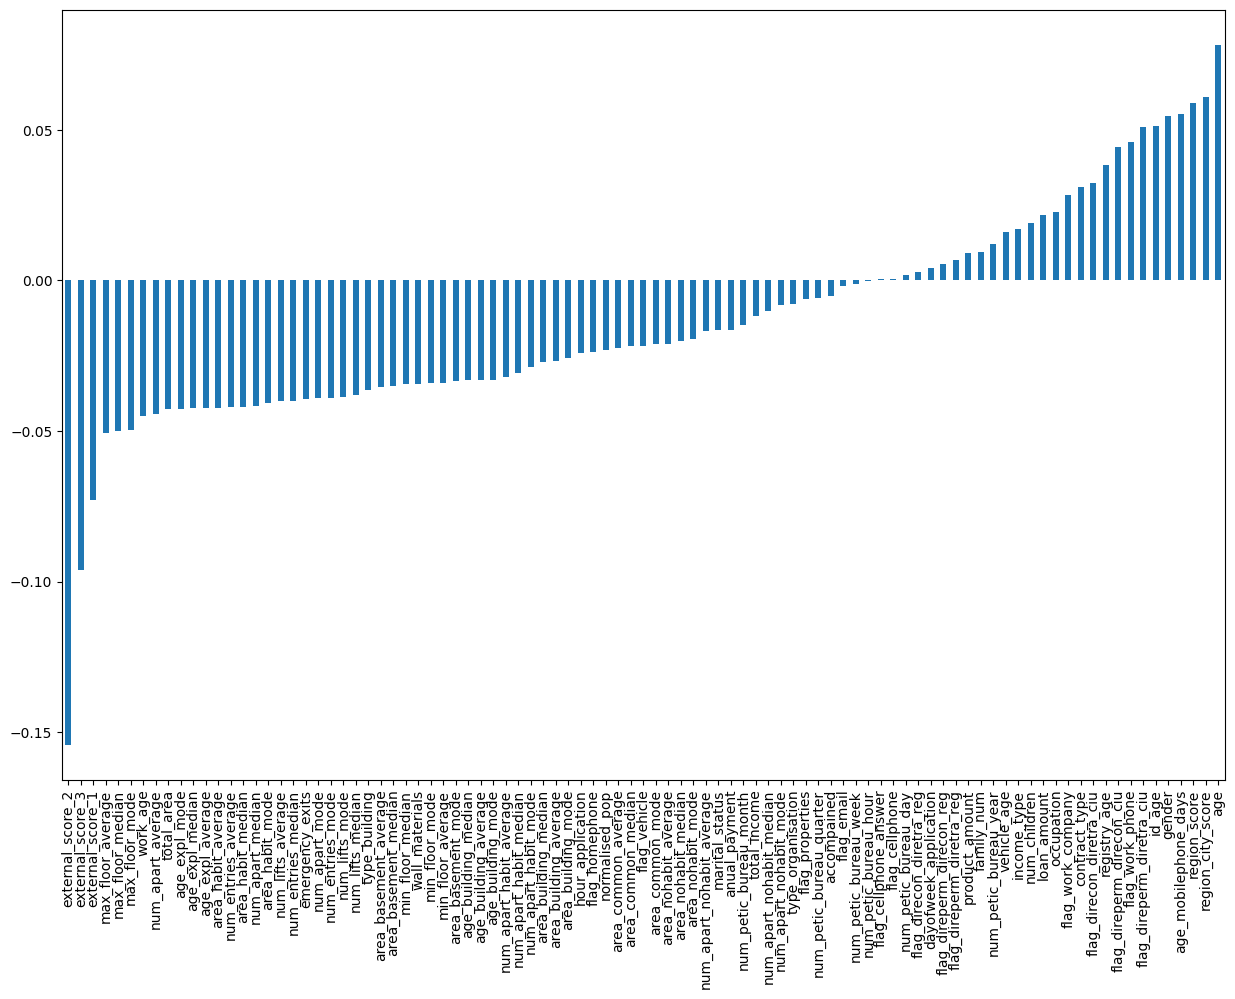

In [15]:
# Studying correlations with respect to the target varible (Exited).
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
data.corr()['default'].sort_values(ascending=True)[:-1].plot(kind='bar')
plt.show()

In [26]:
data = data.drop(dis, axis=1)
data.head(5)

,default,contract_type,gender,flag_vehicle,loan_amount,normalised_pop,age,work_age,registry_age,id_age,...,min_floor_median,area_building_median,num_apart_habit_median,area_habit_median,area_nohabit_median,type_building,total_area,wall_materials,emergency_exits,age_mobilephone_days
0,1,1,1,0,3266,63,-9461,-637,12011,-2120,...,6,366,46,184,0,0,140,0,0,-1134.0
1,0,1,0,0,1019,11,-16765,-1188,14473,-291,...,16,123,182,549,91,0,705,1,0,-828.0
2,0,0,1,1,1182,47,-19046,-225,11399,-2531,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-815.0
3,0,1,0,0,2901,34,-19005,-3039,5826,-2437,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-617.0
4,0,1,1,0,3717,74,-19932,-3038,11348,-3458,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1106.0


### Modeling and training

In [27]:
# Libraries for importing the data and creating the Logistic Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
#  Generating the data to separate the response variable from the original data
X = data.drop(data.columns[0], axis=1)
y = data.pop(data.columns[0])

In [29]:
# Separating data into training and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [30]:
# Creating and training the model. After some proves you can check that 'newton-cg' solver has a better performance
clf_lin =  LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X, y)

/home/ling/GrupoLaera/venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


### Metrics and state of the model

In [31]:
# Measuring the results
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, clf_lin.predict(X_test))

array([[93362,     0],
       [ 8117,     0]])

In [32]:
accuracy_score(y_test, clf_lin.predict(X_test))

0.9200130076173395

In [33]:
# Saving binaries for the reusing of the model, the equivalence of categorical variables, and the model features 

import pickle
pickle.dump(clf_lin, open("models/model.pk", "wb"))
pickle.dump(features, open("models/features.pk", "wb"))

### Testing other algoritms

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
y_svm = svm_model.predict(X_test)

In [ ]:
score = accuracy_score(y_svm, y_test)
print(score)